In [4]:
import qiskit
import numpy as np
import sys
sys.path.insert(1, '../../')
import , qoop.constant, qoop.ansatz, qoop.gradient, qoop.state

<module 'qoop.gradient' from '..\\qoop\\fubini_study.py'>

20/12/2021

In this notebook I will conduct the experiments about tomography.

With $U_{gen} = $ Haar random

And $U_{target} = W + ZXZ, W = W_{chainCNOT}, W_{all to all CNOT}, W_{alternating CNOT}$

### 1. Wchain CNOT

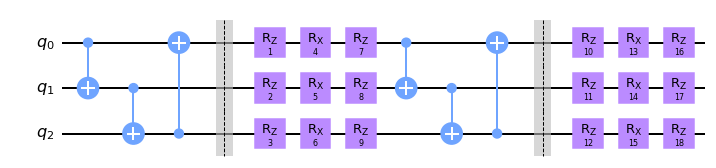

In [6]:
num_qubits = 3
num_layers = 2
thetas = np.ones(num_layers*num_qubits*3)
for i in range(0, len(thetas)):
    thetas[i] += i
psi = 2*np.random.rand(2**num_qubits)-1
psi = psi / np.linalg.norm(psi)
encoder = qoop.state.Encoding(psi, 'amplitude_encoding')

qc = qiskit.QuantumCircuit(num_qubits)
qc = qoop.ansatz.create_WchainCNOT_layerd_state(qc, thetas, num_layers=num_layers)
qc.draw('mpl')

In [8]:
num_qubits = 3
num_layers = 2
thetas = np.ones(num_layers*num_qubits*3)
psi = 2*np.random.rand(2**num_qubits)-1
psi = psi / np.linalg.norm(psi)
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc.initialize(psi, qubits = range(0, num_qubits))
loss_values = []
thetass = []
for i in range(0, 50):
    if i % 10 == 0:
        print('W_chain: ', i)
    G = qoop.gradient.qng(qc.copy(), thetas, qoop.ansatz.create_WchainCNOT_layerd_state, num_layers)
    grad_loss = .grad_loss(
        qc, 
        qoop.ansatz.create_WchainCNOT_layerd_state,
        thetas, num_layers = num_layers)
    thetas = np.real(thetas - qoop.constant.learning_rate*(np.linalg.inv(G) @ grad_loss))
    thetass.append(thetas.copy())
    qc_copy = qoop.ansatz.create_WchainCNOT_layerd_state(qc.copy(), thetas, num_layers)  
    loss = qoop.loss.loss_basic(.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values.append(loss)


W_chain:  0
[[0.22878164+0.j 0.        +0.j 0.02947729+0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.24791221+0.j 0.0101128 +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.02947729+0.j 0.0101128 +0.j 0.2073194 +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.24031009+0.j
  0.        +0.j 0.12776345+0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.  

In [ ]:
traces = []
fidelities = []

for thetas in thetass:
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qoop.ansatz.create_WchainCNOT_layerd_state(qc, thetas, num_layers = num_layers).inverse()
    psi_hat = qi.Statevector.from_instruction(qc)
    trace, fidelity = .get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
print('Writting ... ' + str(num_qubits))

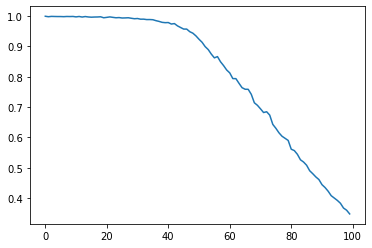

In [ ]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

### 2. W alternating CNOT

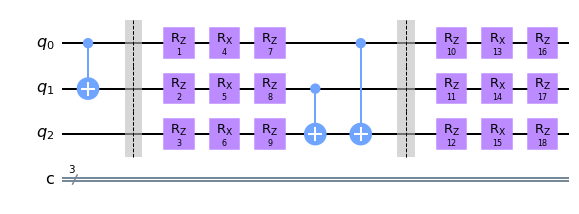

In [10]:
num_qubits = 3
num_layers = 2
thetas = np.ones(3 * num_layers * num_qubits)
for i in range(0, len(thetas)):
    thetas[i] += i
psi = 2 * np.random.uniform(0, 2*np.pi, (2**num_qubits))
psi = psi / np.linalg.norm(psi)
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qoop.ansatz.create_WalternatingCNOT_layerd_state(qc, thetas, num_layers) 
qc.draw('mpl')

In [11]:
num_qubits = 3
num_layers = 2
thetas = np.ones(3 * num_layers * num_qubits)
psi = 2 * np.random.uniform(0, 2*np.pi, (2**num_qubits))
psi = psi / np.linalg.norm(psi)
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc.initialize(psi, range(num_qubits))

loss_values = []
thetass = []
for i in range(0, 50):
    if i % 20 == 0:
        print('W_alternating: ', i)
    G = qoop.gradient.qng(qc.copy(), thetas, qoop.ansatz.create_WalternatingCNOT_layerd_state, num_layers)
    grad_loss = .grad_loss(
        qc, 
        qoop.ansatz.create_WalternatingCNOT_layerd_state,
        thetas, num_layers = num_layers)
    thetas = np.real(thetas - qoop.constant.learning_rate*(np.linalg.pinv(G) @ grad_loss)) 
    thetass.append(thetas.copy())
    qc_copy = qoop.ansatz.create_WalternatingCNOT_layerd_state(qc.copy(), thetas, num_layers)  
    loss = qoop.loss.loss_basic(.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values.append(loss)

W_alternating:  0
W_alternating:  20
W_alternating:  40


In [27]:
traces = []
fidelities = []

for thetas in thetass:
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qoop.ansatz.create_WalternatingCNOT_layerd_state(qc, thetas, num_layers = num_layers).inverse()
    psi_hat = qi.Statevector.from_instruction(qc)
    # Calculate the metrics
    trace, fidelity = .get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
print('Writting ... ' + str(num_qubits))

Writting ... 3


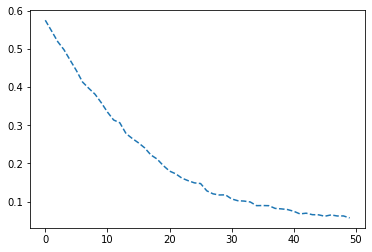

In [12]:
from matplotlib import pyplot as plt
plt.plot(loss_values, label='Loss', linestyle = '--')

### 3. W all to all CNOT

In [16]:
num_qubits = 4
num_layers = 2
n_walltoall = qoop.ansatz.calculate_n_walltoall(num_qubits)
thetas = np.ones(num_layers * 3 * num_qubits)
for i in range(0, len(thetas)):
    thetas[i] += i
psi = 2 * np.random.rand(2**num_qubits) - 1
psi = psi / np.linalg.norm(psi)
encoder = qoop.state.Encoding(psi, 'amplitude_encoding')
qc = qiskit.QuantumCircuit(num_qubits)
qc = qoop.ansatz.create_WalltoallCNOT_layerd_state(qc,
                                              thetas,
                                              num_layers=num_layers)
qc.draw('mpl')

In [14]:
num_qubits = 3
num_layers = 2
n_walltoall = qoop.ansatz.calculate_n_walltoall(num_qubits)
thetas = np.ones(num_layers* 3 * num_qubits)
psi = 2*np.random.rand(2**num_qubits)-1
psi = psi / np.linalg.norm(psi)
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc.initialize(psi)
loss_values = []
thetass = []

for i in range(0, 50):
    if i % 20 == 0:
        print('W_chain: ', i)
    G = qoop.gradient.qng(qc.copy(), thetas, qoop.ansatz.create_WalltoallCNOT_layerd_state, num_layers)
    grad_loss = .grad_loss(
        qc, 
        qoop.ansatz.create_WalltoallCNOT_layerd_state,
        thetas, num_layers = num_layers)
    thetas -= qoop.constant.learning_rate*(grad_loss) 
    thetass.append(thetas.copy())
    qc_copy = qoop.ansatz.create_WalltoallCNOT_layerd_state(qc.copy(), thetas, num_layers)  
    loss = qoop.loss.loss_basic(.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values.append(loss)


W_chain:  0
W_chain:  20
W_chain:  40


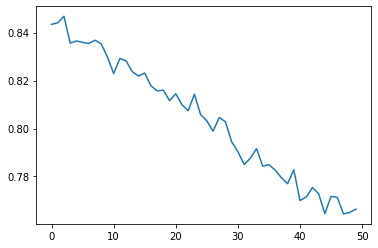

In [15]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [111]:
traces = []
fidelities = []

for thetas in thetass:
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qoop.ansatz.create_WalltoallCNOT_layerd_state(qc, thetas, num_layers = num_layers).inverse()
    psi_hat = qi.Statevector.from_instruction(qc)
    trace, fidelity = .get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
print('Writting ... ' + str(num_qubits))

Writting ... 3
